### Evaluation of bins from gold-standard contigs

#### Linear classifier and AMBER Evaluation

                  Tools  Marine  Strain-madness  Plant-associated
0                  VAMB   82.89           35.93             53.57
1              SemiBin2   80.98           42.96             59.14
2               COMEBin   84.41           41.59             63.29
3            GenomeFace   87.95           46.08             65.10
4               TaxVAMB   86.70           26.81             42.46
5  TaxVAMB_wo_taxometer   86.94           30.48             43.54


/tmp/ipykernel_3294269/753259237.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


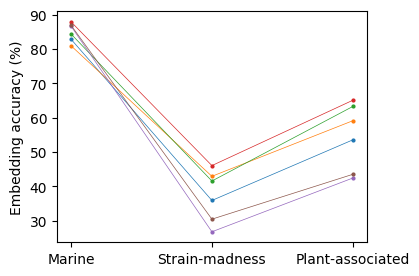

                  Tools    Marine  Strain-madness  Plant-associated clustering
0                  VAMB  0.554409        0.223139          0.241766        own
1              SemiBin2  0.679641        0.399480          0.401060        own
2               COMEBin  0.693241        0.422782          0.401695        own
3            GenomeFace  0.631553        0.481621          0.349783        own
4               TaxVAMB  0.666343        0.178123          0.284189        own
5  TaxVAMB_wo_taxometer  0.646023        0.188061          0.276154        own


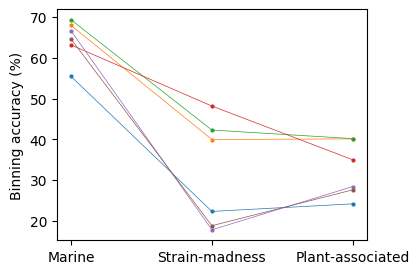

                   Tools    Marine  Strain-madness  Plant-associated  \
6                   VAMB  0.669460        0.281250          0.345984   
7               SemiBin2  0.637993        0.347215          0.445797   
8                COMEBin  0.693241        0.422782          0.401695   
9             GenomeFace  0.564334        0.305866          0.388572   
10               TaxVAMB  0.667796        0.353842          0.353509   
11  TaxVAMB_wo_taxometer  0.661222        0.247427          0.342419   

   clustering  
6     comebin  
7     comebin  
8     comebin  
9     comebin  
10    comebin  
11    comebin  


(15.0, 72.0)

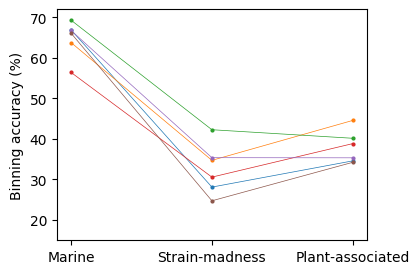

In [10]:
# FIGURE 1

## Embedding accuracy
import matplotlib.pyplot as plt
import pandas as pd

accuracy = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/LinearClassifier_accuracy.csv', header=0, sep='\t')
tools = ['VAMB', 'SemiBin2', 'COMEBin', 'GenomeFace', 'TaxVAMB', 'TaxVAMB_wo_taxometer']
datasets = ['Marine', 'Strain-madness', 'Plant-associated']
print(accuracy)

plt.figure(figsize=(4, 3))

for i, tool in enumerate(tools):
    plt.plot(datasets, accuracy.iloc[i,1:], marker='o', markersize=2, linewidth=0.5)

plt.ylabel('Embedding accuracy (%)')
plt.legend(frameon=False)
plt.show()
plt.savefig('/home/yazhini/work/binning_benchmarking/plots/embedding_accuracy.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')

##############################

## Clustering accuracy using own clustering approach
import matplotlib.pyplot as plt
import pandas as pd

accuracy = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/AMBER_accuracy.csv', header=0, sep='\t')
tools = ['VAMB', 'SemiBin2', 'COMEBin', 'GenomeFace', 'TaxVAMB', 'TaxVAMB_wo_taxometer']
datasets = ['Marine', 'Strain-madness', 'Plant-associated']
accuracy = accuracy[accuracy['clustering'] == 'own']
print(accuracy)
plt.figure(figsize=(4, 3))

for i, tool in enumerate(tools):
    plt.plot(datasets, accuracy.iloc[i,1:-1]*100, marker='o', label=tool, markersize=2, linewidth=0.5)

plt.ylabel('Binning accuracy (%)')
plt.show()
# plt.legend(frameon=False,loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('/home/yazhini/work/binning_benchmarking/plots/binning_accuracy.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')

##############################

## Accuracy of bins after comebin clustering on the individual binner's embedding space
import matplotlib.pyplot as plt
import pandas as pd

accuracy = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/AMBER_accuracy.csv', header=0, sep='\t')

tools = ['VAMB', 'SemiBin2', 'COMEBin', 'GenomeFace', 'TaxVAMB', 'TaxVAMB_wo_taxometer']
datasets = ['Marine', 'Strain-madness', 'Plant-associated']
accuracy = accuracy[accuracy['clustering'] == 'comebin']
print(accuracy)

plt.figure(figsize=(4, 3))

for i, tool in enumerate(tools):
    plt.plot(datasets, accuracy.iloc[i,1:-1]*100, marker='o', label=tool, markersize=2, linewidth=0.5)

plt.ylabel('Binning accuracy (%)')
plt.ylim(15,72)
# plt.legend(frameon=False,loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('/home/yazhini/work/binning_benchmarking/plots/binning_accuracy_comebin_clustering.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')


### Plot the number of MAGs for various quality

High-quality: 90% completeness and 5% contamination\
Medium-quality: 70% completeness and 10% contamination\
Low-quality: 50% completeness and 10% contamination

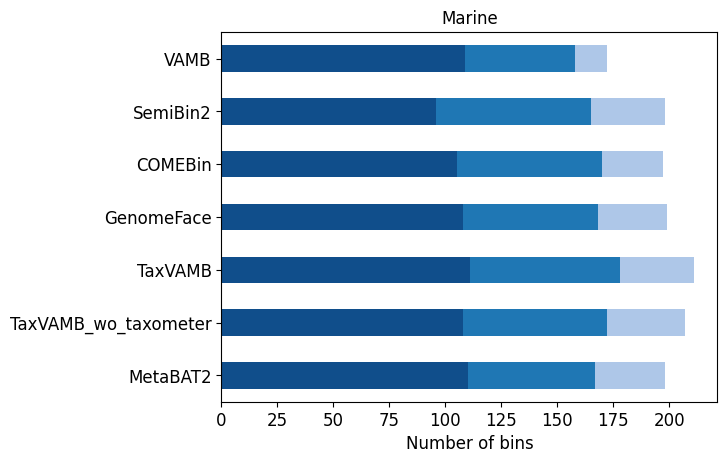

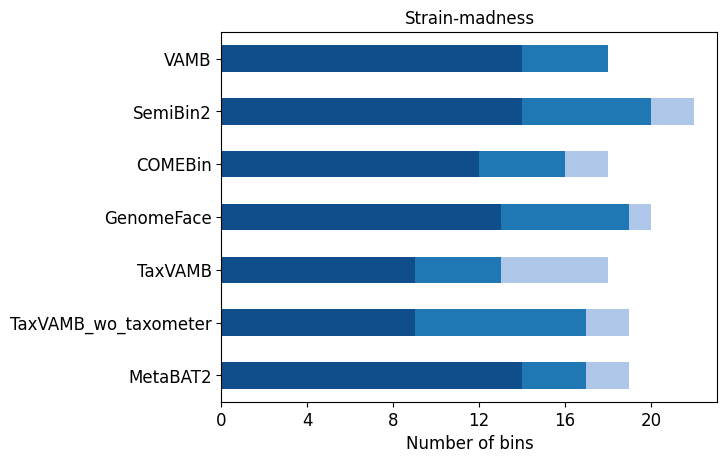

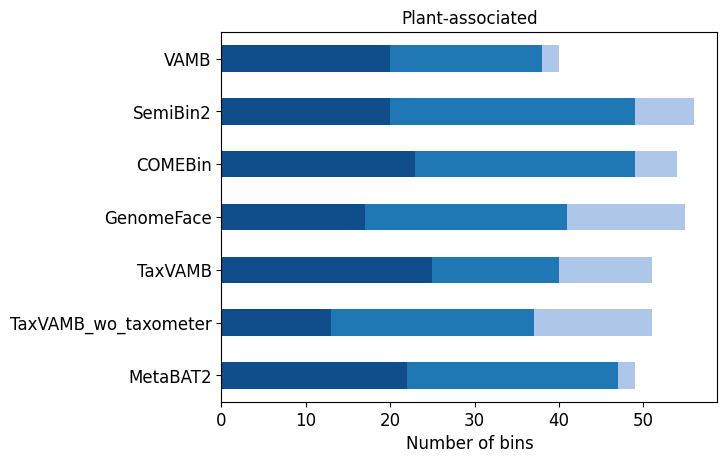

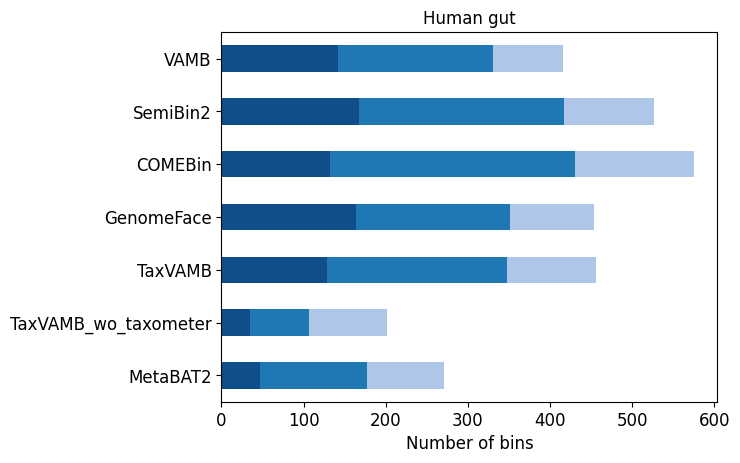

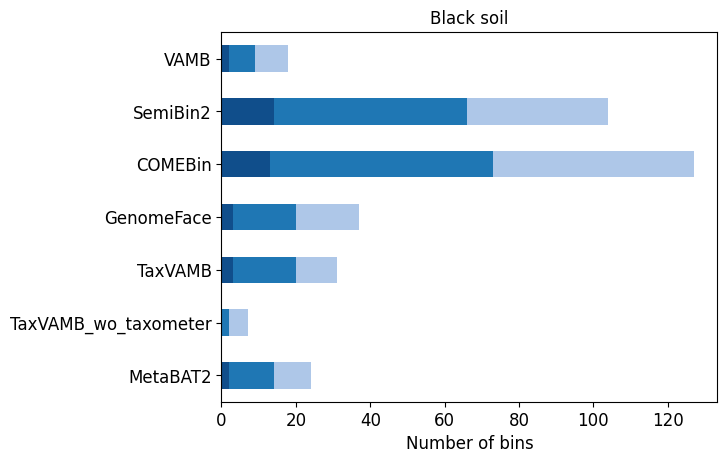

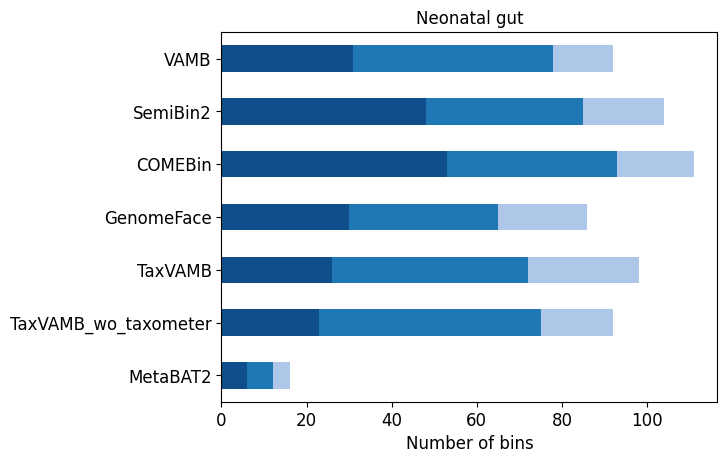

In [ ]:
# FIGURE 2

import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']
mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/performance_results.csv', header=0, sep='\t')
mags_counts = mags_counts.iloc[::-1]
mags_counts.set_index('Tools', inplace=True)

datasets = ['marine', 'strain', 'plant', 'humangut', 'blacksoil', 'neonatal']

datasets_names = {
    'marine': 'Marine',
    'strain': 'Strain-madness',
    'plant': 'Plant-associated',
    'humangut': 'Human gut',
    'blacksoil': 'Black soil',
    'neonatal': 'Neonatal gut'}

for f in datasets:
    plot_pooled = mags_counts.loc[mags_counts['Dataset']==f'{f} pooled']
    plot_data = plot_pooled[['High-quality', 'Medium', 'Low']]
    colors = ['#104e8b', '#1f77b4', '#aec7e8']

    plot_data.plot.barh(stacked=True, color=colors,tick_label=plot_pooled.index)
    plt.title(datasets_names[f])
    if f == 'strain':
        plt.xticks(range(0,22,4))
    plt.xlabel('bin counts')
    # plt.legend(['High-quality (>90%,<5%)', 'Medium-quality (>70%,<10%)', 'Low-quality (>50%,<10%)'], loc=(1.04, 0.8), frameon=False)
    plt.legend('', frameon=False)
    plt.xlabel('Number of bins', fontsize=12)
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'plots/pooled_assembly_{f}.png', dpi=600, format='png', bbox_inches='tight')



### Effect of post-binning reassembly

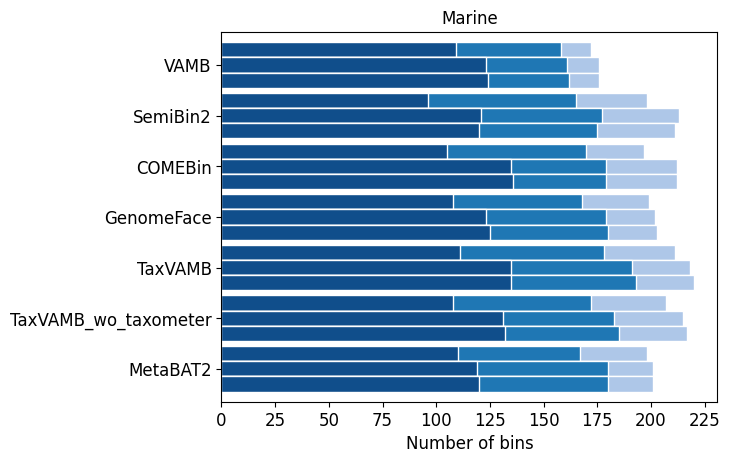

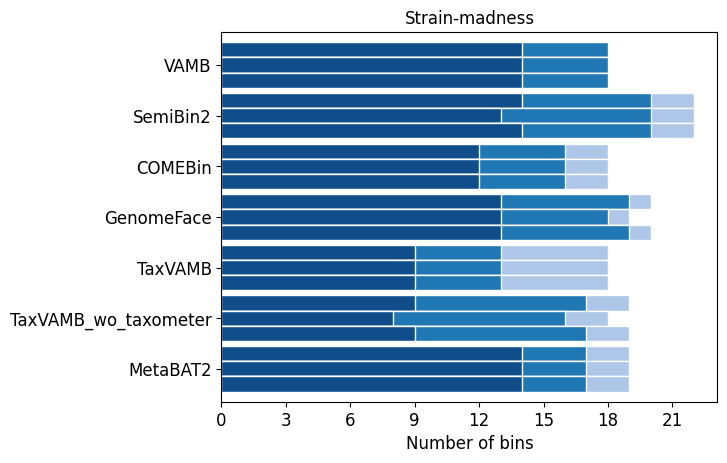

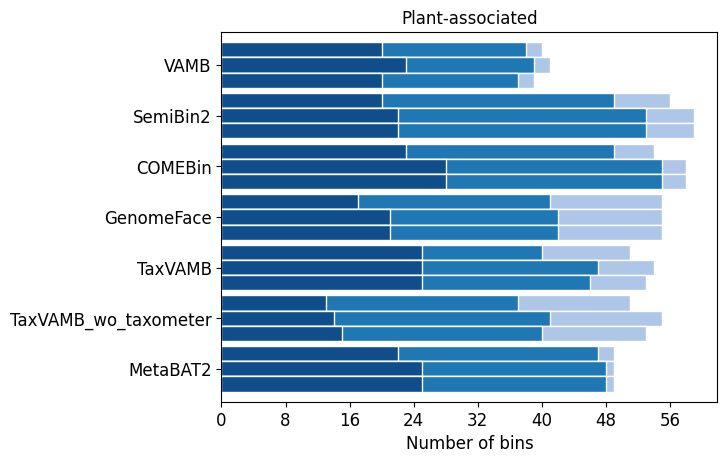

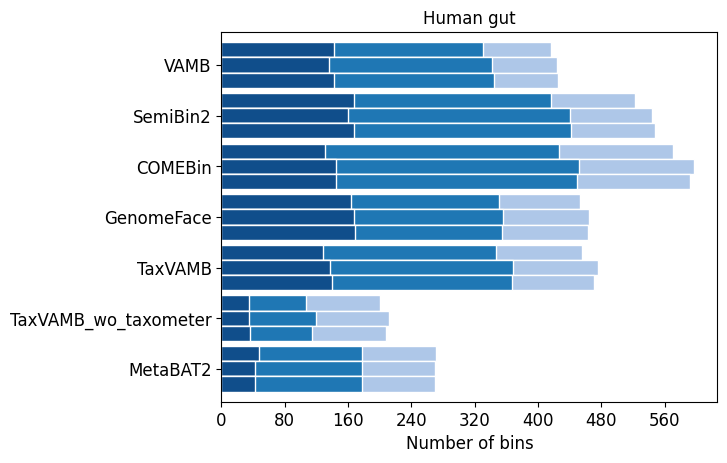

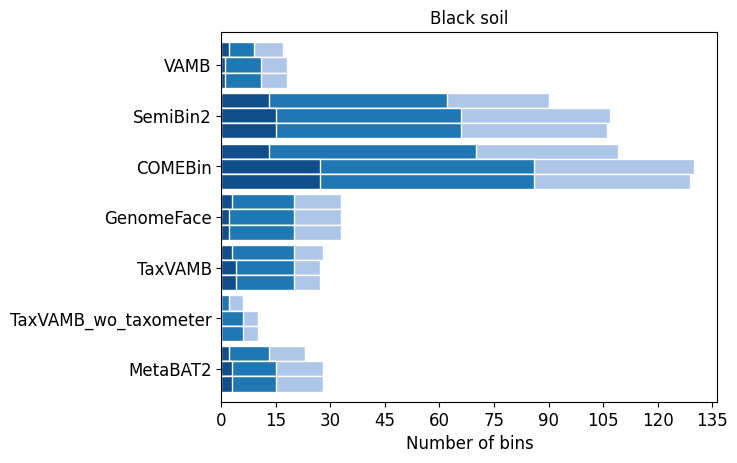

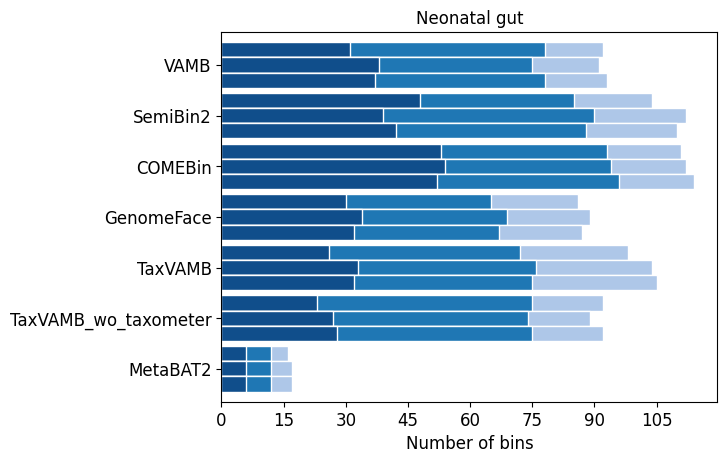

In [21]:
# FIGURE 3

import numpy as np
from matplotlib.ticker import MaxNLocator

datasets = ['marine', 'strain', 'plant', 'humangut', 'blacksoil', 'neonatal']

datasets_names = {
    'marine': 'Marine',
    'strain': 'Strain-madness',
    'plant': 'Plant-associated',
    'humangut': 'Human gut',
    'blacksoil': 'Black soil',
    'neonatal': 'Neonatal gut'}

for f in datasets:

    plot_data_raw = pd.read_csv(f"results/{f}_reassembly_summary", sep=',', header=0)

    plot_data = plot_data_raw.pivot_table(index='tool', columns='category', values=['high_count', 'medium_count', 'low_count'], aggfunc='sum')
    desired_tool_order = ['vamb', 'semibin2', 'comebin', 'genomeface', 'taxvamb', 'taxvamb_notaxo','metabat2'][::-1]
    plot_data = plot_data.loc[desired_tool_order]
    fig, ax = plt.subplots()

    bar_width = 0.3
    bar_gap = 0.05

    x_pos = np.arange(len(plot_data), dtype=int)

    bar_width = 0.3
    bar_gap = 0.05

    colors = ['#104e8b', '#1f77b4', '#aec7e8']
    colors_ra = ['#0a4277','#2a65a8','#7cb9e7']
    y_pos = range(len(plot_data))
    y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
    y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 

    # Plot the bars for high, medium, and low counts for each condition
    (plot_data['high_count']['beforereassembly'] + plot_data['medium_count']['beforereassembly'] + plot_data['low_count']['beforereassembly']).plot(
        kind='barh', color=colors[2], width=bar_width, ax = ax, position=0, edgecolor='white'
    )
    (plot_data['high_count']['beforereassembly'] + plot_data['medium_count']['beforereassembly']).plot(
        kind='barh', color=colors[1], width=bar_width, ax = ax, position=0, edgecolor='white'
    )
    (plot_data['high_count']['beforereassembly']).plot(
        kind='barh', color=colors[0], width=bar_width, ax = ax, position=0, edgecolor='white'
    )


    (plot_data['high_count']['afterreassembly'] + plot_data['medium_count']['afterreassembly'] + plot_data['low_count']['afterreassembly']).plot(
        kind='barh', color=colors[2], width=bar_width, ax = ax, position=1, edgecolor='white'
    )
    (plot_data['high_count']['afterreassembly'] + plot_data['medium_count']['afterreassembly']).plot(
        kind='barh', color=colors[1], width=bar_width, ax = ax, position=1, edgecolor='white'
    )
    (plot_data['high_count']['afterreassembly']).plot(
        kind='barh', color=colors[0], width=bar_width, ax = ax, position=1, edgecolor='white'
    )


    (plot_data['high_count']['lowcoveragereassembly'] + plot_data['medium_count']['lowcoveragereassembly'] + plot_data['low_count']['lowcoveragereassembly']).plot(
        kind='barh', color=colors[2], width=bar_width, ax = ax, position=2, edgecolor='white'
    )
    (plot_data['high_count']['lowcoveragereassembly'] + plot_data['medium_count']['lowcoveragereassembly']).plot(
        kind='barh', color=colors[1], width=bar_width, ax = ax, position=2, edgecolor='white'
    )
    (plot_data['high_count']['lowcoveragereassembly']).plot(
        kind='barh', color=colors[0], width=bar_width, ax = ax, position=2, edgecolor='white'
    )

    ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
    tools_list = ["VAMB", "SemiBin2", "COMEBin", "GenomeFace", "TaxVAMB", "TaxVAMB_wo_taxometer", "MetaBAT2"][::-1]
    ax.set_yticklabels(tools_list)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.legend('',frameon=False)
    # plt.legend(['Low quality (>50%,<10%)', 'Medium quality (>70%,<10%)', 'High quality (>90%,<5%)'], loc=(1.04, 0.8))
    plt.title(datasets_names[f], fontsize=12)
    plt.xlabel('Number of bins', fontsize=12)
    plt.ylabel('')
    plt.ylim(-0.8, 6.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'plots/{f}_beforeafterreassembly_lowcoverage.png', dpi=600, format='png', bbox_inches='tight')



### Comparison of three binning approaches

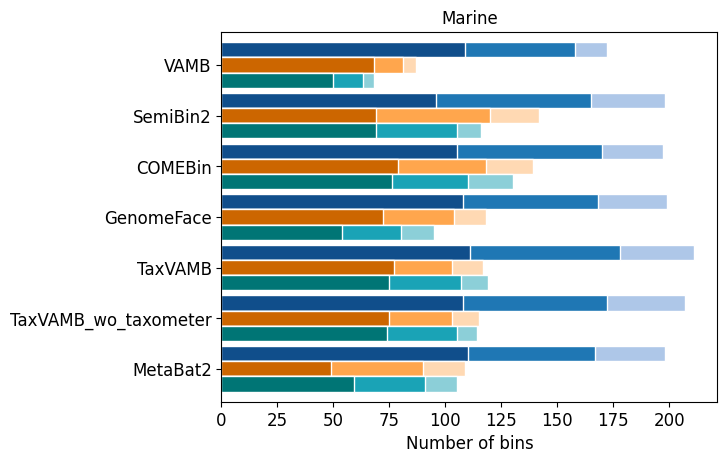

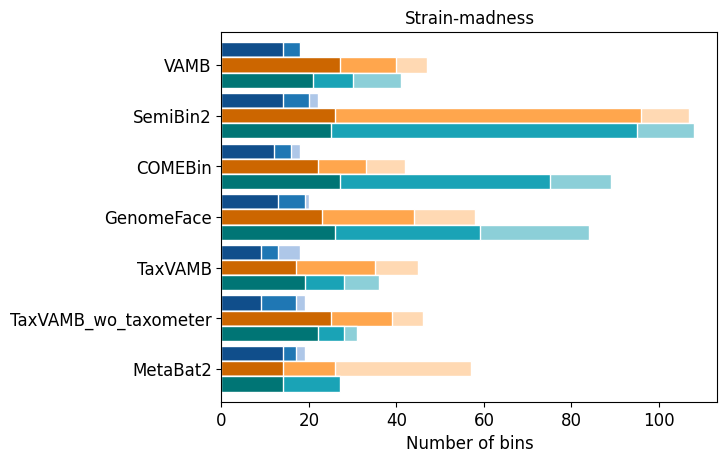

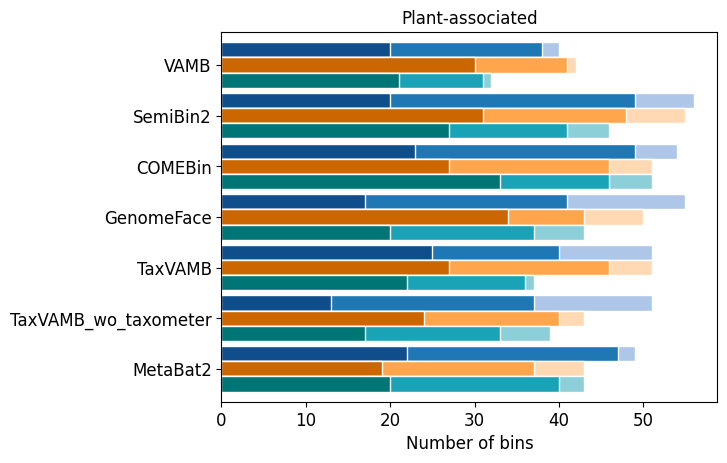

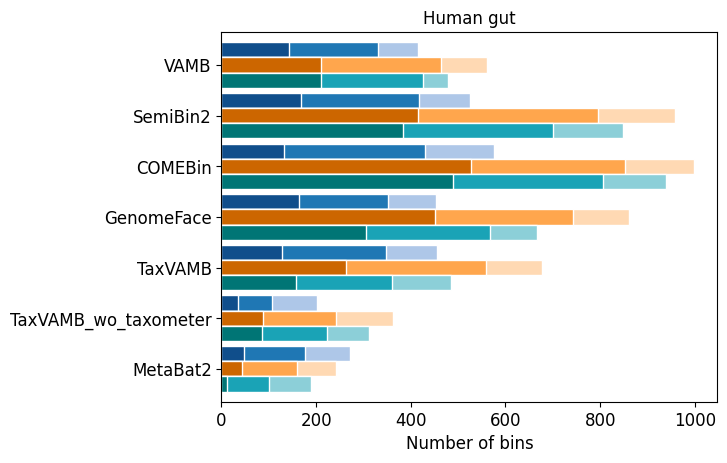

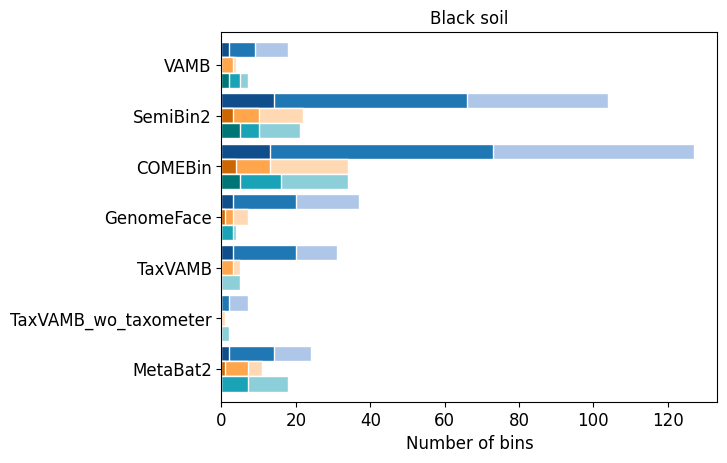

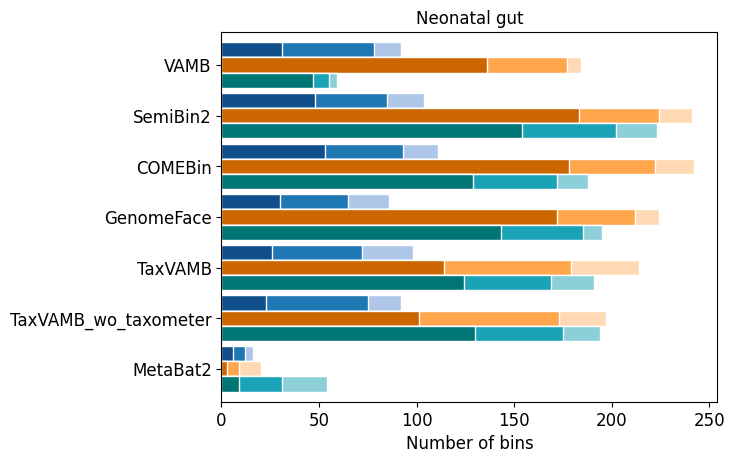

In [30]:
# FIGURE 4

import pandas as pd
import matplotlib.pyplot as plt

nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/pooled_vs_single_vs_multisamplenonredundant', header=0, sep='\t')

datasets = ['marine', 'strain', 'plant', 'humangut', 'blacksoil', 'neonatal']

datasets_names = {
    'marine': 'Marine',
    'strain': 'Strain-madness',
    'plant': 'Plant-associated',
    'humangut': 'Human gut',
    'blacksoil': 'Black soil',
    'neonatal': 'Neonatal gut'}

for f in datasets:

    mags_counts = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains(f'{f}_pooled|{f}_single|{f}_multisample')]
    mags_counts.set_index(['Tools', 'Dataset'], inplace=True)
    tools_order = mags_counts.index.get_level_values(0).unique()
    mags_counts_plot = mags_counts.reindex(tools_order[::-1], level=0)
    mags_counts_plot = mags_counts_plot.unstack(level=-1)

    tools = ['VAMB', 'SemiBin2', 'COMEBin','GenomeFace', 'TaxVAMB', 'TaxVAMB_wo_taxometer', 'MetaBat2']

    fig, ax = plt.subplots()

    bar_width = 0.3
    bar_gap = 0.05

    colors = ['#104e8b', '#1f77b4', '#aec7e8']
    colors_ss = ['#007575', '#1AA3B6', '#8CCFD8']
    colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

    y_pos = range(len(mags_counts_plot))
    y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
    y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 

    (mags_counts_plot['High-quality'][f'{f}_pooled'] +
    mags_counts_plot['Medium'][f'{f}_pooled'] +
    mags_counts_plot['Low'][f'{f}_pooled']).plot(
        kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_pooled'] +
    mags_counts_plot['Medium'][f'{f}_pooled']).plot(
        kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_pooled']).plot(
        kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_multisample'] +
    mags_counts_plot['Medium'][f'{f}_multisample'] +
    mags_counts_plot['Low'][f'{f}_multisample']).plot(
        kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_multisample'] +
    mags_counts_plot['Medium'][f'{f}_multisample']).plot(
        kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_multisample']).plot(
        kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_single'] +
    mags_counts_plot['Medium'][f'{f}_single'] +
    mags_counts_plot['Low'][f'{f}_single']).plot(
        kind='barh', color=colors_ss[2], width=bar_width, ax=ax, position=2, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_single'] +
    mags_counts_plot['Medium'][f'{f}_single']).plot(
        kind='barh', color=colors_ss[1], width=bar_width, ax=ax, position=2, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_single']).plot(
        kind='barh', color=colors_ss[0], width=bar_width, ax=ax, position=2, edgecolor='white')

    ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
    ax.set_yticklabels(tools[::-1])

    plt.legend('', frameon=False)
    plt.title(datasets_names[f], fontsize=12)
    plt.xlabel('Number of bins', fontsize=12)
    plt.ylabel('')
    plt.ylim(-0.8, 6.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(f'plots/{f}_pooled_single_multisample_nr.png', dpi=600, format='png', bbox_inches='tight')


### Time and Memory usage

/tmp/ipykernel_3294269/527039846.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Marine', 'Strain-madness', 'Plant-associated', 'Human gut', 'Black soil', 'Neonatal gut'], size=12, rotation=45)
/tmp/ipykernel_3294269/527039846.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Marine', 'Strain-madness', 'Plant-associated', 'Human gut', 'Black soil', 'Neonatal gut'], size=12, rotation=45)


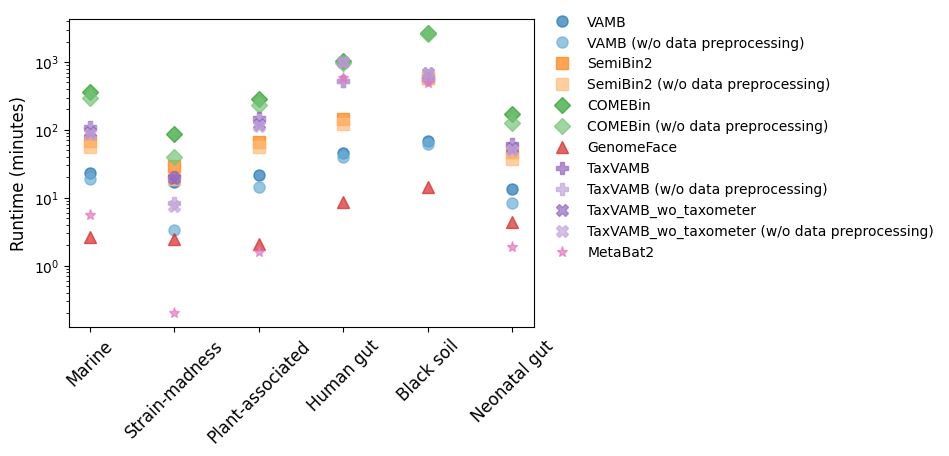

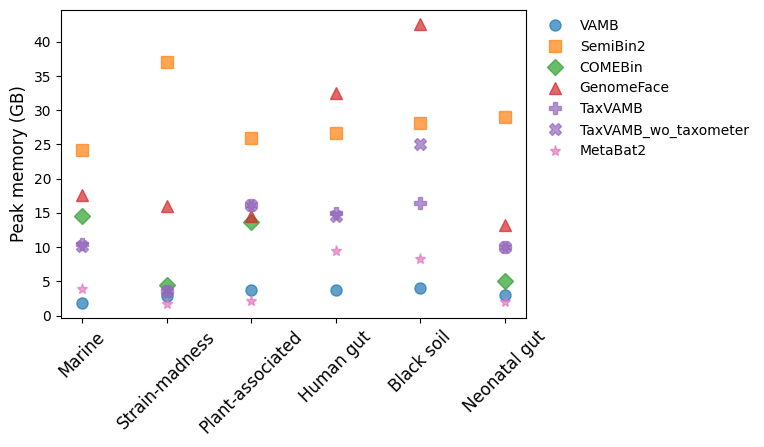

In [ ]:
# FIGURE 5

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Runtime usage
time_memory = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/time_memory_usage_pooled_plot',  header=0, sep='\t')
tools = time_memory['Tools'].unique()
datasets = time_memory['Datasets'].unique()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

datasets_order = ['Marine', 'Strain-madness', 'Plant-associated', 'Humangut', 'Blacksoil', 'Neonatal gut']

pivot_df = time_memory.pivot(index='Datasets', columns='Tools', values='Time (minutes)')
pivot_df = pivot_df.reindex(datasets_order)

colors = [
    '#1f77b4', # Blue
    '#6baed6',
    '#ff7f0e', # Orange
    '#ffbb78',
    '#2ca02c', # Green
    '#76c476',
    '#d62728', # Red
    '#9467bd', # Purple
    '#c2a5db',
    '#9467bd', # Purple
    '#c2a5db',
    '#e377c2',   # Pink
]

markers = [
    'o',  # Circle
    'o',  # Circle
    's',  # Square
    's',  # Square
    'D',  # Diamond
    'D',  # Diamond
    '^',  # Triangle Up
    'P',  # Plus (filled)
    'P',  # Plus (filled)
    'X',  # X (filled)
    'X',  # X (filled)
    '*',  # Star
]

for i, tool in enumerate(tools):
    time_data = time_memory[time_memory['Tools'] == tool]['Time (minutes)']
    ax.plot(datasets, time_data, marker=markers[i], label=tool, color = colors[i], linewidth=0.0, markersize=8, alpha=0.7)

ax.set_yscale('log')
ax.set_ylabel('Runtime (minutes)', size=12)
ax.set_xticklabels(['Marine', 'Strain-madness', 'Plant-associated', 'Human gut', 'Black soil', 'Neonatal gut'], size=12, rotation=45)
ticks = [1, 10, 100, 1000]
ax.set_yticks(ticks)
ax.legend(loc=(1.02,0.2),frameon=False)
plt.savefig('plots/time_requirement_mapooled.png', dpi=600, format='png', bbox_inches='tight')


## Memory usage
time_memory = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/time_memory_usage_pooled_plot',  header=0, sep='\t')
time_memory = time_memory[~time_memory['Tools'].str.contains('preprocessing', case=False, na=False)]
tools = time_memory['Tools'].unique()
datasets = time_memory['Datasets'].unique()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

datasets_order = ['Marine', 'Strain-madness', 'Plant-associated', 'Humangut', 'Blacksoil', 'Neonatal gut']

pivot_df = time_memory.pivot(index='Datasets', columns='Tools', values='Memory (GB)')
pivot_df = pivot_df.reindex(datasets_order)

colors = [
    '#1f77b4', # Blue
    '#ff7f0e', # Orange
    '#2ca02c', # Green
    '#d62728', # Red
    '#9467bd', # Purple
    '#9467bd', # Purple
    '#e377c2',   # Pink
]
markers = [
    'o',  # Circle
    's',  # Square
    'D',  # Diamond
    '^',  # Triangle Up
    'P',  # Plus (filled)
    'X',  # X (filled)
    '*',  # Star
]

for i, tool in enumerate(tools):
    time_data = time_memory[time_memory['Tools'] == tool]['Memory (GB)']
    ax.plot(datasets, time_data, marker=markers[i], label=tool, color = colors[i], linewidth=0.0, markersize=8, alpha=0.7)

ax.set_ylabel('Peak memory (GB)', size=12)
ax.set_xticklabels(['Marine', 'Strain-madness', 'Plant-associated', 'Human gut', 'Black soil', 'Neonatal gut'], size=12, rotation=45)
ax.legend(loc=(1.02,0.5),frameon=False)
plt.savefig('plots/memory_requirement_mapooled.png', dpi=600, format='png', bbox_inches='tight')

### Supplementary Figures

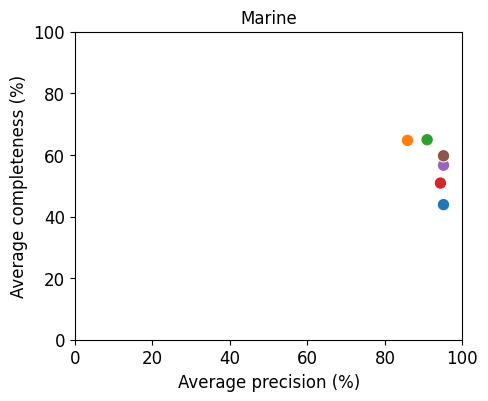

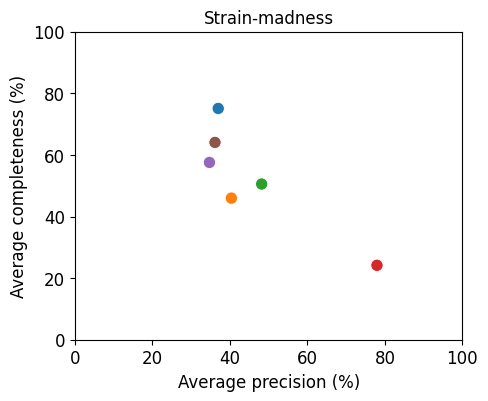

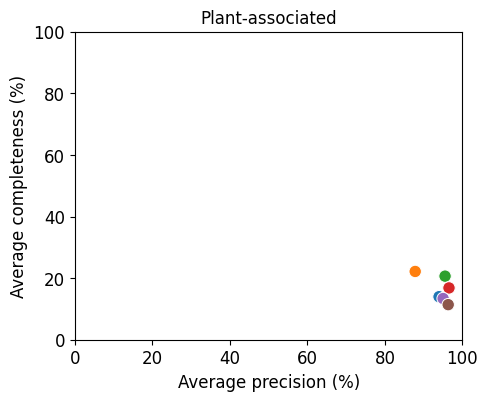

In [34]:
# completeness (bp) and purity (bp)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
path="/home/yazhini/work/binning_benchmarking/results/"
comp_purity = pd.read_csv(path + 'AMBER_average_purity_completeness_bp.csv', header=0, sep='\t')


ss_comp_purity = comp_purity.loc[comp_purity['Dataset'].str.contains('Strain-madness')]
pl_comp_purity = comp_purity.loc[comp_purity['Dataset'].str.contains('Plant-associated')]

cami2_datasets = ['Marine', 'Strain-madness', 'Plant-associated']

cami2_datasets_names = {
    'Marine': 'marine',
    'Strain-madness': 'strain',
    'Plant-associated': 'plant'
}

for f in cami2_datasets:
    subset_comp_purity = comp_purity.loc[comp_purity['Dataset'].str.contains(f)]

    plt.figure(figsize=(5, 4))
    sns.scatterplot(
        data=subset_comp_purity,
        x=subset_comp_purity['precision_avg_bp'] * 100,
        y=subset_comp_purity['recall_avg_bp'] * 100,
        hue='Tool',
        s=80,
        legend=False
    )

    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.xlabel("Average precision (%)", fontsize=12)
    plt.ylabel("Average completeness (%)", fontsize=12)
    plt.title(f)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'/home/yazhini/work/binning_benchmarking/plots/{cami2_datasets_names[f]}_average_purity_completeness_bp.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')


### Gold standard pooled contigs AMBER assessment

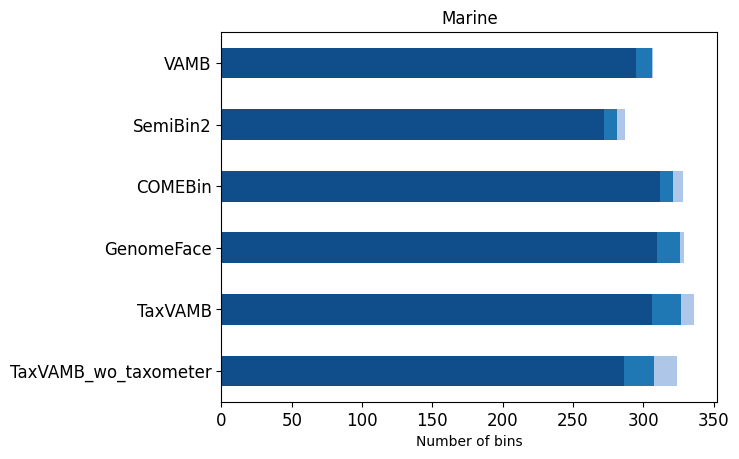

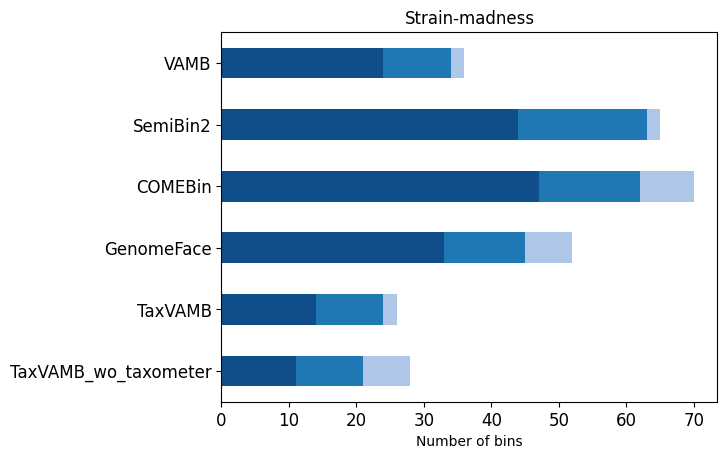

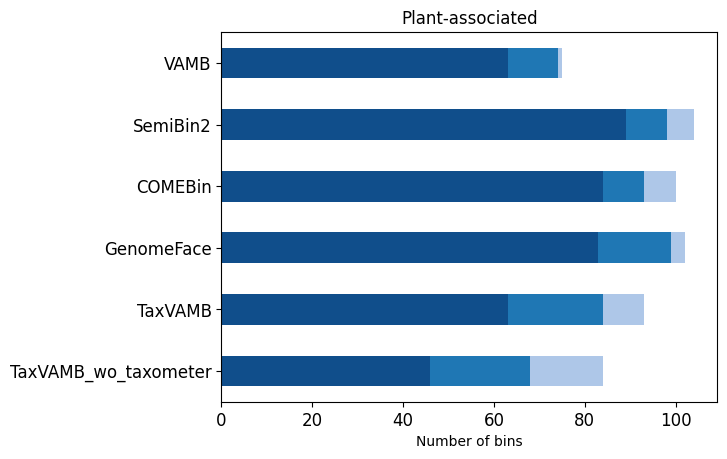

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

gsmags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/goldstandard_pooled_amber.csv', header=0, sep='\t')
gsmags_counts.index = gsmags_counts['Tools']
gsmags_counts = gsmags_counts.iloc[::-1]

cami2_datasets = ['Marine', 'Strain-madness', 'Plant-associated']

cami2_datasets_names = {
    'Marine': 'marine',
    'Strain-madness': 'strain',
    'Plant-associated': 'plant'
}

for f in cami2_datasets:
    gs_pooled = gsmags_counts.loc[gsmags_counts['Dataset']==f]

    gsplot_data = gs_pooled[['High-quality', 'Medium', 'Low']]
    colors = ['#104e8b', '#1f77b4', '#aec7e8']
    gsplot_data.plot.barh(stacked=True, color=colors)
    plt.title(f)
    plt.xlabel('bin counts')
    # plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
    plt.legend('',frameon=False)
    plt.xlabel('Number of bins')
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'plots/amber_gspooled_assembly_{cami2_datasets_names[f]}.png', dpi=600, format='png', bbox_inches='tight')


### Gold standard pooled contigs CheckM2 assessment

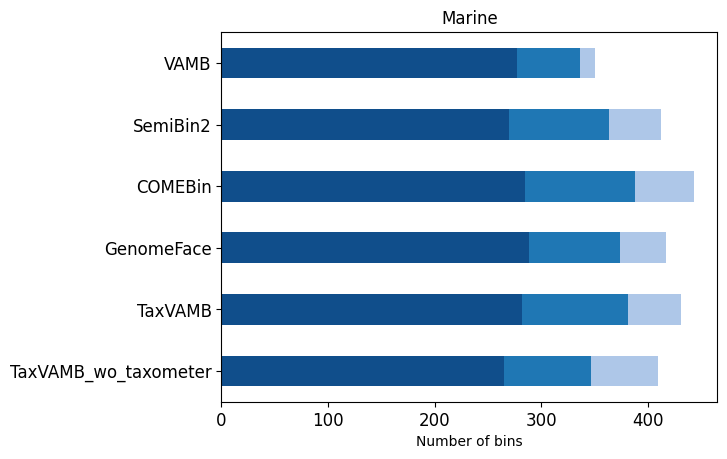

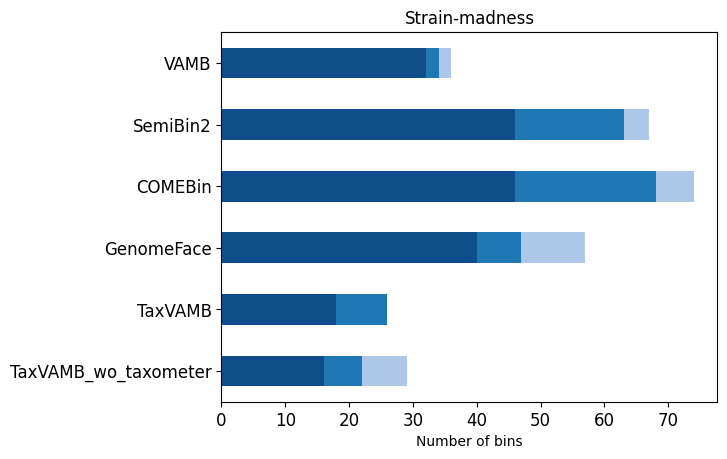

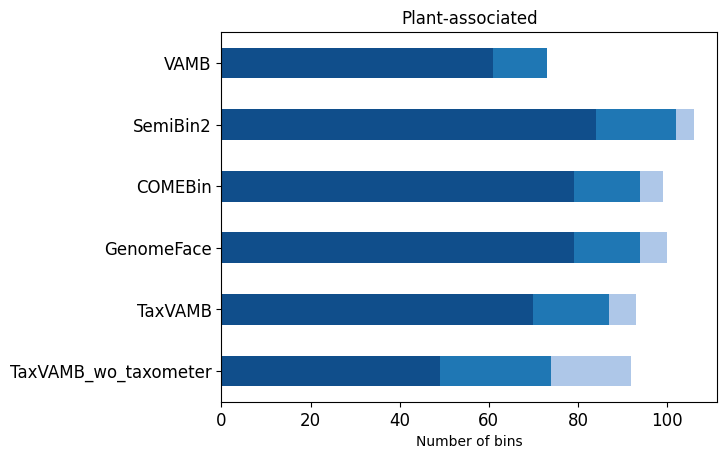

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

gsmags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/goldstandard_pooled_checkm2.csv', header=0, sep='\t')
gsmags_counts.index = gsmags_counts['Tools']
gsmags_counts = gsmags_counts.iloc[::-1]

cami2_datasets = ['Marine', 'Strain-madness', 'Plant-associated']

cami2_datasets_names = {
    'Marine': 'marine',
    'Strain-madness': 'strain',
    'Plant-associated': 'plant'
}

for f in cami2_datasets:
    gs_pooled = gsmags_counts.loc[gsmags_counts['Dataset']==f]

    gsplot_data = gs_pooled[['High-quality', 'Medium', 'Low']]
    colors = ['#104e8b', '#1f77b4', '#aec7e8']
    gsplot_data.plot.barh(stacked=True, color=colors)
    plt.title(f)
    plt.xlabel('bin counts')
    # plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
    plt.legend('',frameon=False)
    plt.xlabel('Number of bins')
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'plots/checkm2_gspooled_assembly_{cami2_datasets_names[f]}.png', dpi=600, format='png', bbox_inches='tight')


### AMBER vs CheckM2 completeness and contamination

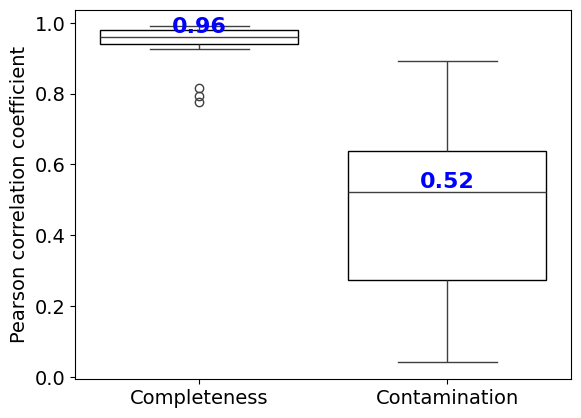

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corrdata = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/AMBER_CheckM2_pearsonr', sep='\t')

df_melted = corrdata.melt(value_vars=['Completeness', 'Contamination'],
                    var_name='Method', value_name='Pearson correlation coefficient')

ax = sns.boxplot(x='Method', y='Pearson correlation coefficient', data=df_melted,
                 boxprops=dict(facecolor='none', edgecolor='black'))

grouped = df_melted.groupby('Method')['Pearson correlation coefficient'].median()
for i, (method, median_val) in enumerate(grouped.items()):
    ax.text(i, median_val, f'{median_val:.2f}', 
            ha='center', va='bottom', fontweight='bold', color='blue', fontsize=16)

ax.set_xlabel("", fontsize=14)
ax.set_ylabel('Pearson correlation coefficient', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
plt.savefig('/home/yazhini/work/binning_benchmarking/plots/amber_checkm2_pearson_correlation_coefficient.png', dpi=600, format='png', bbox_inches='tight')


### Post-reassembly effect on different bin quality categories

                   Tools        Category  Improvement
0               MetaBAT2    High-quality     8.181818
1   TaxVAMB_wo_taxometer    High-quality    21.296296
2                TaxVAMB    High-quality    21.621622
3             GenomeFace    High-quality    13.888889
4                COMEBin    High-quality    28.571429
5               SemiBin2    High-quality    26.041667
6                   VAMB    High-quality    12.844037
7               MetaBAT2  Medium-quality     7.784431
8   TaxVAMB_wo_taxometer  Medium-quality     6.395349
9                TaxVAMB  Medium-quality     7.303371
10            GenomeFace  Medium-quality     6.547619
11               COMEBin  Medium-quality     5.294118
12              SemiBin2  Medium-quality     7.272727
13                  VAMB  Medium-quality     1.898734
14              MetaBAT2     Low-quality     1.515152
15  TaxVAMB_wo_taxometer     Low-quality     3.864734
16               TaxVAMB     Low-quality     3.317536
17            GenomeFace    

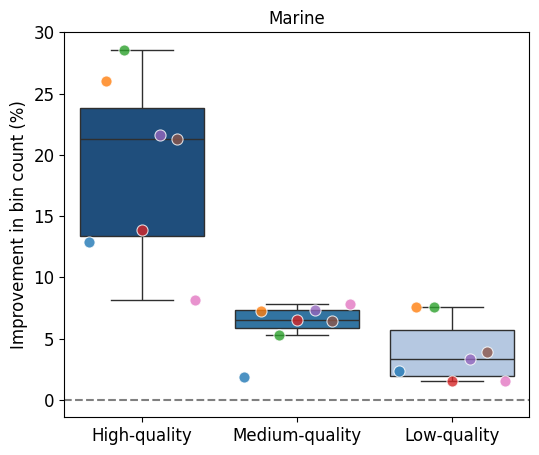

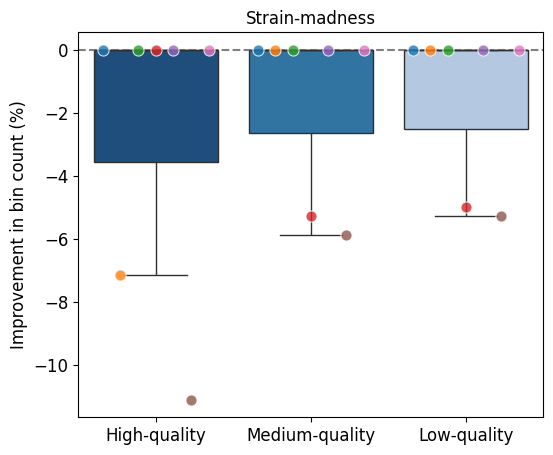

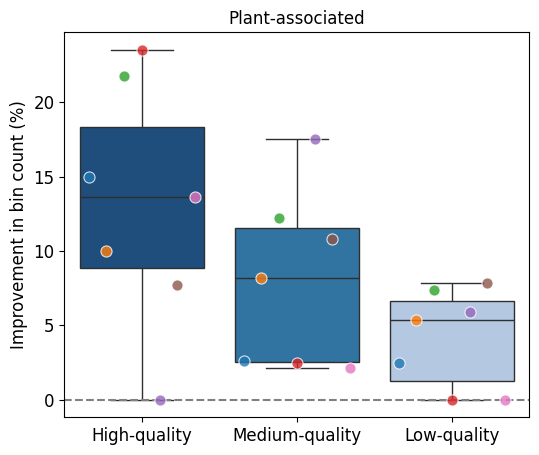

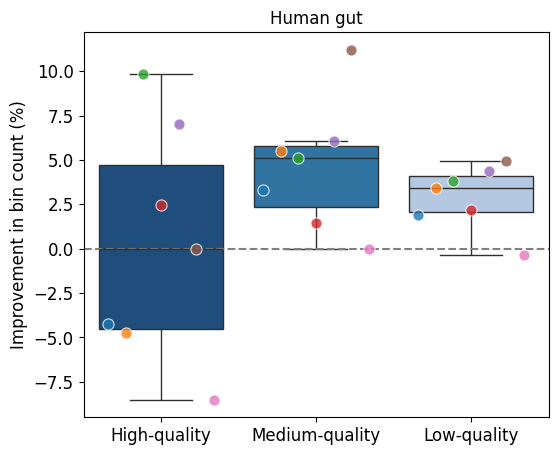

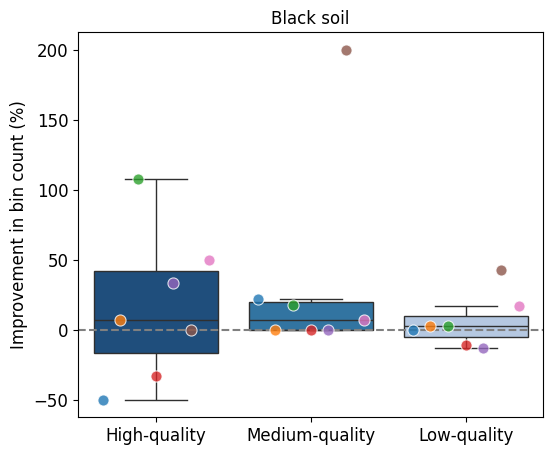

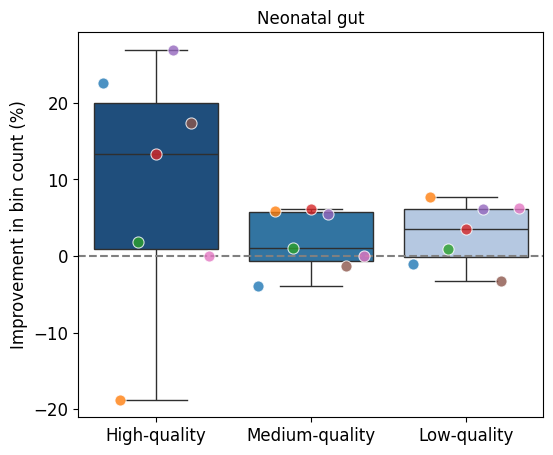

In [29]:
import seaborn as sns

mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/performance_results.csv', header=0, sep='\t')
mags_counts = mags_counts.iloc[::-1]
tools_order = ['VAMB', 'SemiBin2', 'COMEBin', 'GenomeFace', 'TaxVAMB', 'TaxVAMB_wo_taxometer', 'MetaBAT2']
datasets = ['marine', 'strain', 'plant', 'humangut', 'blacksoil', 'neonatal']

datasets_names = {
    'marine': 'Marine',
    'strain': 'Strain-madness',
    'plant': 'Plant-associated',
    'humangut': 'Human gut',
    'blacksoil': 'Black soil',
    'neonatal': 'Neonatal gut'}

for f in datasets:
    ra_pooled = mags_counts[mags_counts['Dataset'] == f'{f} pooled'].set_index('Tools')
    ra_reassembly = mags_counts[mags_counts['Dataset'] == f'{f} reassembly'].set_index('Tools')

    ra_diff = ra_reassembly[['High-quality', 'Medium-quality', 'Low-quality']] - \
            ra_pooled[['High-quality', 'Medium-quality', 'Low-quality']]

    ra_percent_improvement = (ra_diff / ra_pooled[['High-quality', 'Medium-quality', 'Low-quality']]) * 100
    
    # ra_diff = ra_diff.reset_index().melt(id_vars='Tools', var_name='Category', value_name='Difference')
    ra_percent_improvement = ra_percent_improvement.reset_index().melt(id_vars='Tools', var_name='Category', value_name='Improvement')
    ra_percent_improvement.fillna(0, inplace=True)
    print(ra_percent_improvement)

    plt.figure(figsize=(6, 5))
    sns.boxplot(data=ra_percent_improvement, x='Category', y='Improvement', hue = 'Category',  palette=['#104e8b', '#1f77b4', '#aec7e8'], showfliers=False)
    sns.stripplot(data=ra_percent_improvement, x='Category', y='Improvement', hue = 'Tools', hue_order=tools_order, edgecolor='white', linewidth=0.8, size=8, jitter=True, dodge=True, alpha=0.8)
    
    plt.title(datasets_names[f], fontsize=12)
    plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
    plt.ylabel("Improvement in bin count (%)", fontsize=12)
    plt.xticks()
    plt.legend([], frameon=False)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.savefig(f'plots/reassembly_gain_{f}.png', dpi=600, format='png', bbox_inches='tight')

### Cluster-and-split vs Split-and-cluster

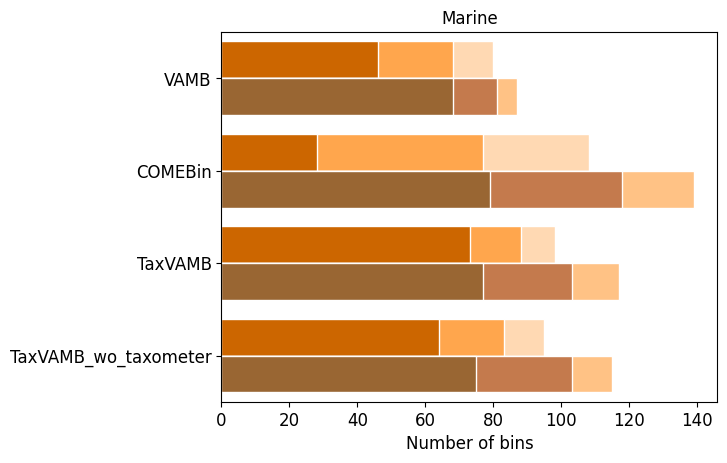

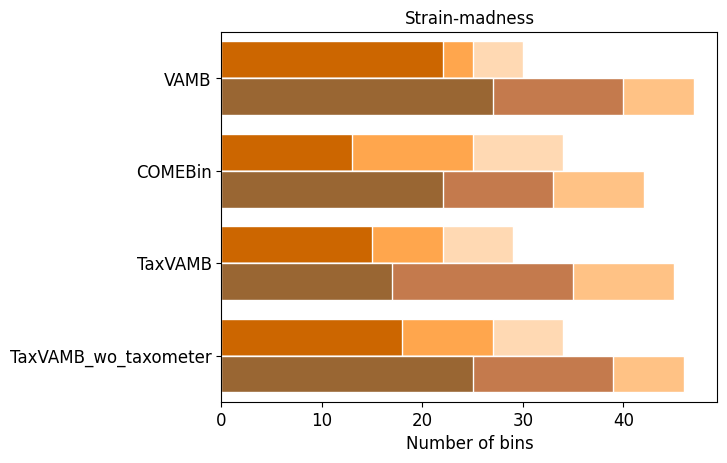

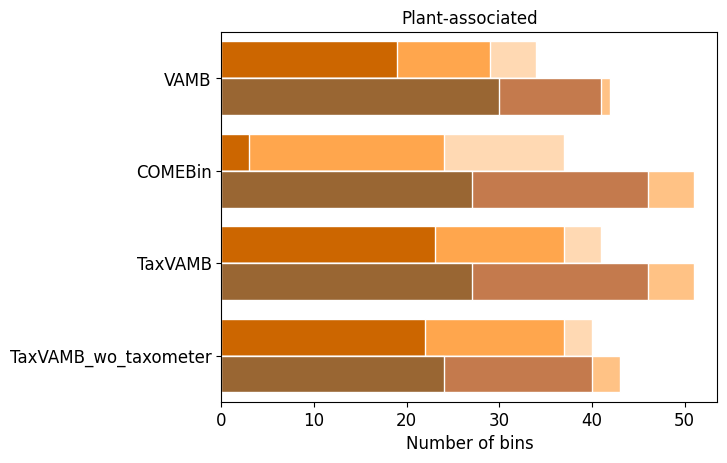

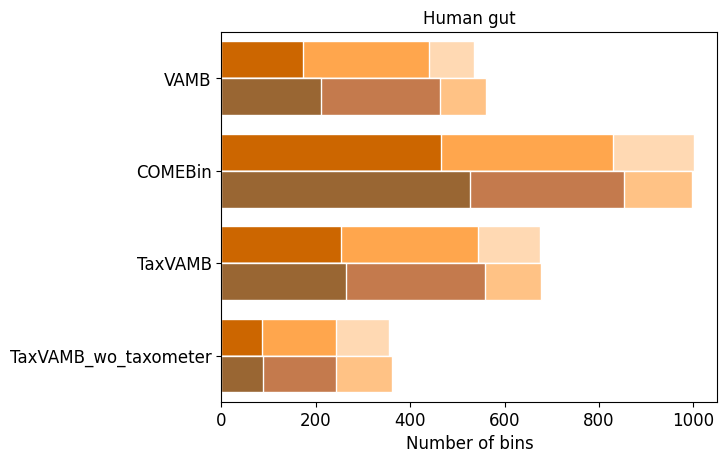

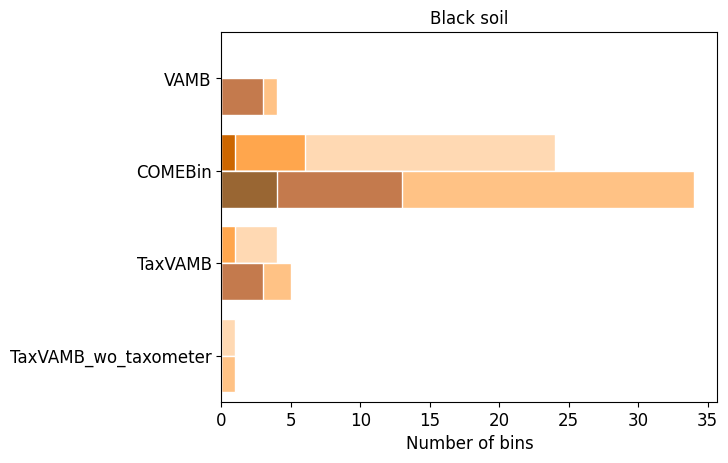

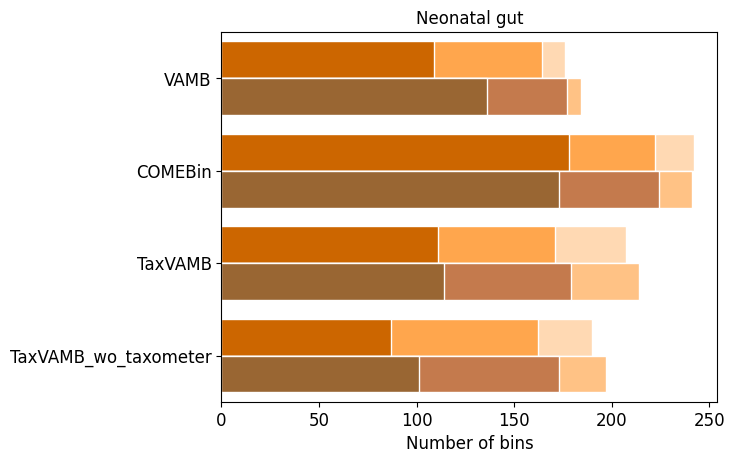

In [22]:

nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

datasets = ['marine', 'strain', 'plant', 'humangut', 'blacksoil', 'neonatal']

datasets_names = {
    'marine': 'Marine',
    'strain': 'Strain-madness',
    'plant': 'Plant-associated',
    'humangut': 'Human gut',
    'blacksoil': 'Black soil',
    'neonatal': 'Neonatal gut'}

for f in datasets:
    mags_counts = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains(f'{f}_cluster_split|{f}_split_cluster')]
    mags_counts.set_index(['Tools', 'Dataset'], inplace=True)
    tools_order = mags_counts.index.get_level_values(0).unique()
    mags_counts_plot = mags_counts.reindex(tools_order[::-1], level=0)
    mags_counts_plot = mags_counts_plot.unstack(level=-1)

    fig, ax = plt.subplots()

    bar_width = 0.4
    bar_gap = 0.05

    colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
    colors_sc = ['#996633', '#c47a4d', '#ffc285']

    y_pos = range(len(mags_counts_plot))
    y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

    (mags_counts_plot['High-quality'][f'{f}_cluster_split'] +
    mags_counts_plot['Medium'][f'{f}_cluster_split'] +
    mags_counts_plot['Low'][f'{f}_cluster_split']).plot(
        kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=0, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_cluster_split'] +
    mags_counts_plot['Medium'][f'{f}_cluster_split']).plot(
        kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=0, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_cluster_split']).plot(
        kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=0, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_split_cluster'] +
    mags_counts_plot['Medium'][f'{f}_split_cluster'] +
    mags_counts_plot['Low'][f'{f}_split_cluster']).plot(
        kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=1, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_split_cluster'] +
    mags_counts_plot['Medium'][f'{f}_split_cluster']).plot(
        kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=1, edgecolor='white')

    (mags_counts_plot['High-quality'][f'{f}_split_cluster']).plot(
        kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=1, edgecolor='white')

    plt.title(datasets_names[f], fontsize=12)
    plt.xlabel('Number of bins', fontsize=12)
    plt.ylabel('')
    plt.ylim(-0.5, 3.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(f'plots/{f}_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

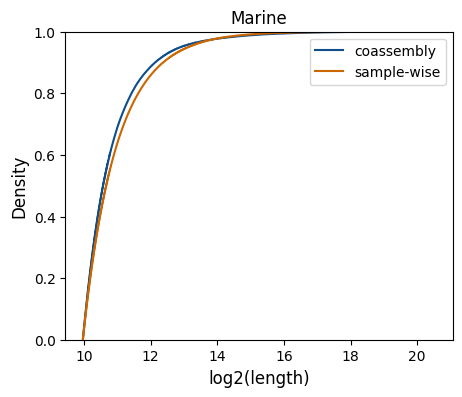

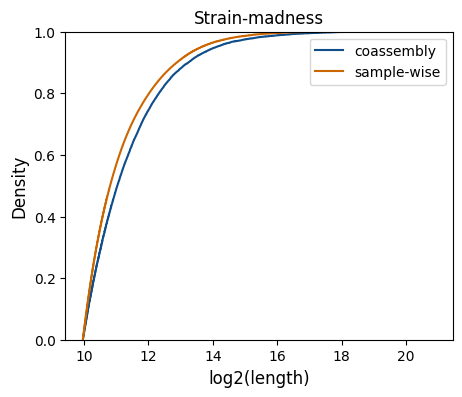

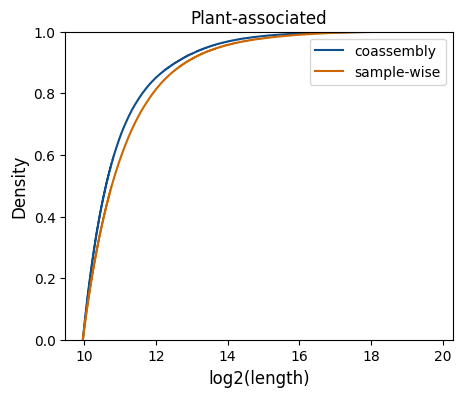

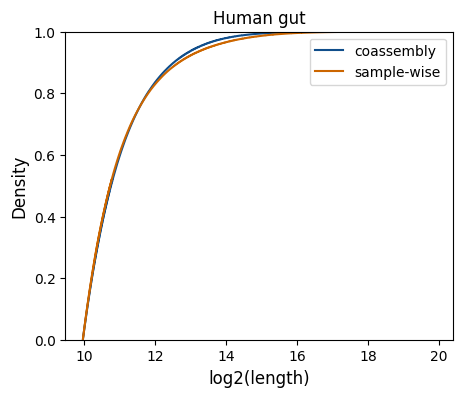

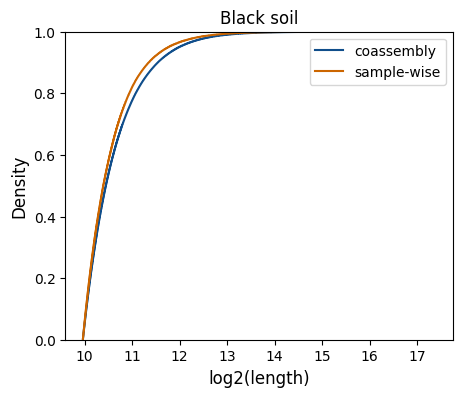

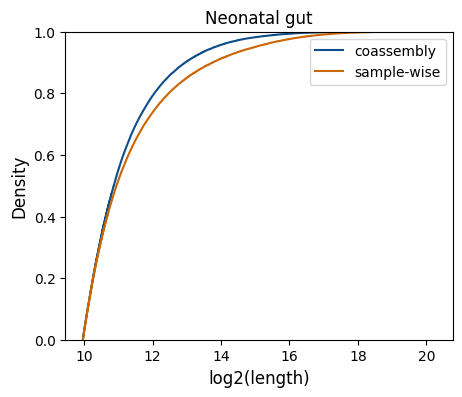

In [8]:
## Contig length distribution

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

datasets = ['marine', 'strain', 'plant', 'humangut', 'blacksoil', 'neonatal']

datasets_names = {
    'marine': 'Marine',
    'strain': 'Strain-madness',
    'plant': 'Plant-associated',
    'humangut': 'Human gut',
    'blacksoil': 'Black soil',
    'neonatal': 'Neonatal gut'}

for f in datasets:
    path="/home/yazhini/work/Results_binning_benchmarking/"
    pooled_lengths = pd.read_csv(path + f'{f}_pooled_contiglength', header=None, sep='\t')
    pooled_lengths = pooled_lengths[pooled_lengths[1] >= 1000][1].to_numpy()
    multisample_lengths = pd.read_csv(path + f'{f}_multisample_contiglength', header=None, sep='\t')
    multisample_lengths = multisample_lengths[multisample_lengths[1] >= 1000][1].to_numpy()
    pooled_lengths = pooled_lengths
    colors = ['#104e8b', '#cc6600']
    plt.figure(figsize=(5, 4))
    # sns.kdeplot(np.log(pooled_lengths), color=colors[0], fill=True, alpha=0.5)
    # sns.kdeplot(np.log(multisplit_lengths), color=colors[1], fill=True, alpha=0.5)
    sns.ecdfplot(np.log2(pooled_lengths), color=colors[0], label='Pooled')
    sns.ecdfplot(np.log2(multisample_lengths), color=colors[1], label='Multisplit')
    # plt.axvline(np.log2(1000), color='gray', linestyle='--', linewidth=1)
    plt.title(datasets_names[f], fontsize=12)
    plt.xlabel('log2(length)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(['coassembly','sample-wise'])
    plt.savefig(path + f'{f}_length.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')